### Amer Islam (awi3) & Anjali Saini (as3268)
# Which factors, if any, influence the spread and fatality of COVID-19?

# Introduction

The Novel Coronavirus (COVID-19) is the most significant pandemic of the last century. Given the modern ease of travel and increased interconnectivity across the world, it appears that we as a species are more vulnerable to the spread of a contagious disease than ever before. Although individuals of all races, earnings brackets, and locales have been affected by this illness, there has been significant discourse surrounding the influence of Social, Environmental, Infrastructural, Health, and Economic factors on vulnerability to infection and rate of mortality. The purpose of this investigation is to further examine these potential factors across various population conditions in order to determine if there truly exists a disparity in extraction and resistance to COVID-19. The results of this study can be used to guide decision-making regarding the enforcement of social distancing measures and allocation of equipment. 
America is unique in that it fosters a significant variation in demographics, infrastructure, health, economic conditions, and geography amongst its own states. After investigating a range of features across these categories, many interesting results were found. For example, examining social factors showed that the spread of ethnicity within the US does not bear a strong correlation on the state level to COVID-19 prevalence. Interestingly, our hypothesis regarding population density’s positive correlation with high prevalence and persistence of COVID-19 was supported by an R-squared value of 0.6. Finally, it was found that even the strong presence of medical infrastructure across the state does not correlate with a higher rate of recovery. Overall, our conclusion showed and disproved many of our assumptions regarding COVID-19 data. Additionally, we faced the conclusion that analyzing data sets across the state level presents many challenges due to the averaging effect. 

**Research Question: What factors, (social, economic, health, environmental, infrastructure), of the US population, if any, influence the spread and persistence of COVID-19 at the state level?**

**Hypothesis: One ethnicity will be strongly correlated to COVID-19 prevalence. Greater economic prosperity will correlate to a lower prevalence of COVID-19. Average temperature increases will correlate to a decrease in prevalence of COVID-19. Greater medical infrastructure will increase the recovery rate of COVID-19.**

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Import Base Set and Drop Non-States (including Washington DC)
covid_case_set = pd.read_csv('state_covid_cases.csv')
filt_df = pd.read_csv('SCPRC-EST2019-18+POP-RES.csv')
poplist = []
namelist = []
for n in covid_case_set['USA State']:
    for name in filt_df['NAME']:
        if name == n:
            #print(name)
            staterow = filt_df.loc[filt_df['NAME']==n]
            statename = staterow['NAME'].item()
            namelist.append(statename)
droplist = []
dropnames = []
for n in covid_case_set['USA State']:
    if n not in namelist:
        dropindex = covid_case_set.loc[covid_case_set['USA State']==n].index.item()
        dropname = n
        droplist.append(dropindex)
        dropnames.append(dropname)
filteredset = covid_case_set.drop(droplist)
filteredset = filteredset[filteredset['USA State'] != 'District of Columbia']

In [3]:
#Renaming Base Set Columns
base_set = pd.DataFrame({'state':filteredset['USA State'],'total_cases':filteredset['Total Cases'],
                        'total_deaths':filteredset['Total Deaths'], 'active_cases' : filteredset['Active Cases'], 
                         'total_cases_per_mil':filteredset['Tot Cases/1M pop'],
                        'total_deaths_per_mil':filteredset['Deaths/1M pop'],
                        'total_tests':filteredset['Total Tests'], 'tests_per_mil':filteredset['Tests/1M pop']})
#Dropping Washington D.C.
base_set = base_set[base_set['state'] != 'District of Columbia']
base_set.reset_index(drop=True)
pass

In [4]:
#Changing Numbers that have been input as strings to floats
base_set['total_cases_per_mil'] = base_set['total_cases_per_mil'].str.replace(',', '')
base_set['total_deaths_per_mil'] = base_set['total_deaths_per_mil'].str.replace(',', '')
base_set['total_tests'] = base_set['total_tests'].str.replace(',', '')
base_set['tests_per_mil'] = base_set['tests_per_mil'].str.replace(',', '')

repl_list = base_set.columns[1:]
for n in repl_list:
    base_set[n]=base_set[n].astype(float)

In [5]:
#Calculating and appending percent of cases resulting in death
death_case_list = []
ratio_list = []
for n in base_set['state']:
    row = base_set.loc[base_set['state']==n]
    deaths = row['total_deaths'].item()
    cases = row['total_cases'].item()
    dc_percent = (deaths/cases)*100
    death_case_list.append(dc_percent)
base_set['%_of_cases_resulting_in_death'] = death_case_list
base_set = base_set.reset_index(drop=True)

In [6]:
#Calculating and appending recovered_cases
recovered_cases = base_set['total_cases'] - base_set['active_cases'] - base_set['total_deaths']
base_set['recovered_cases'] = recovered_cases

In [7]:
#Calculating and appending active_per_total and recovered_per_total
base_set["active_per_total"]= (base_set["active_cases"]/base_set['total_cases'])*100
base_set["recovered_per_total"]= (base_set["recovered_cases"]/base_set['total_cases'])*100

In [8]:
#Add ethnicity values to base set by on sorting state values into a data frame
ethnicity= pd.read_csv("info_ethnic_used.csv")
name_list=[]
ethnic_total_list=[]
ethnic_white_list=[]
ethnic_black_list=[]
ethnic_native_list=[]
ethnic_asian_list=[]
ethnic_islander_list=[]
ethnic_otherrace_list=[]
ethnic_twoormore_list=[]

for state in base_set["state"]:
    for statename in ethnicity["State"]:
        if state == statename:
            ethnic_row = ethnicity.loc[ethnicity["State"]==state]
            #accessing the row within ethnicity that ethnicity state= state in base set
            ethnicity_total = ethnic_row["Total"].item()
            ethnicity_white = ethnic_row["White"].item()
            ethnicity_black = ethnic_row["Black"].item()
            ethnicity_native = ethnic_row["Native"].item()
            ethnicity_asian = ethnic_row["Asian"].item()
            ethnicity_islander = ethnic_row["Islander"].item()
            ethnicity_otherrace= ethnic_row["OtherRace"].item()
            ethnicity_twoormore = ethnic_row["TwoOrMoreRaces"].item()
            # accessing the column values within that row
            ethnic_row_state= ethnic_row["State"].item()
            #state name at that row within
            name_list.append(ethnic_row_state)
            ethnic_total_list.append(ethnicity_total)
            ethnic_white_list.append(ethnicity_white)
            ethnic_black_list.append(ethnicity_black)
            ethnic_native_list.append(ethnicity_native)
            ethnic_asian_list.append(ethnicity_asian)
            ethnic_islander_list.append(ethnicity_islander)
            ethnic_otherrace_list.append(ethnicity_otherrace)
            ethnic_twoormore_list.append(ethnicity_twoormore)
ethnicity_df = pd.DataFrame({'State' : name_list, 'Total Population' : ethnic_total_list, 'White': ethnic_white_list,
                            'Black': ethnic_black_list, 'Native':ethnic_native_list, 'Asian': ethnic_asian_list, 
                            'Islander':ethnic_islander_list, 'Other Race': ethnic_otherrace_list, 
                             'Two or More Races':ethnic_twoormore_list })
ethnicity_df= ethnicity_df.sort_values(by='State')
ethnicity_df.head()
base_set["Total Population"]= ethnicity_df["Total Population"]
base_set["White Population"]= ethnicity_df["White"]
base_set["Black Population"]= ethnicity_df["Black"]
base_set["Native Population"]= ethnicity_df["Native"]
base_set["Asian Population"]= ethnicity_df["Asian"]
base_set["Islander Population"]= ethnicity_df["Islander"]
base_set["Other Race Population"]= ethnicity_df["Other Race"]
base_set["Two or More Race Population"]= ethnicity_df["Two or More Races"]

In [9]:
#Making all ethnicities percentages of respective state populations and appending those columns
#Values for two or more ethinicities and other were excluded
ethnic_list= ["White Population", "Black Population", "Native Population", "Asian Population",
             "Islander Population"]
for eth in ethnic_list:
    frac_list=[]
    for val in base_set[eth]:
        state_row = base_set.loc[base_set[eth]==val]
        num = (state_row[eth].item()) *100
        den= state_row["Total Population"].item()
        frac= num/den
        frac_list.append(frac)  
    base_set["%_State_Pop_that_is_"+ str(eth)] = frac_list

#Making and appending the percentage of state population made up by confirmed cases
base_set["%_cases_of_state_pop"]= base_set["total_cases"]/base_set["Total Population"]

In [10]:
#Adding Hospital Data
hospitals= pd.read_csv("info_hospitals.csv")
hospitals= hospitals[:-1]

#Creating state column without abbreviations for comparison later
new_state= []
for state in hospitals["State"]:
    #print(type(state))
    #print(state)
    dash_index= state.find("-")
    state = state[dash_index+2:]
    new_state.append(state)
hospitals["New State"]= new_state

In [11]:
#Using the hospital table's abberviations to create an abbreviation table for reference for future csvs

abbrlist = []
for state in hospitals['State']:
    abbr = state[:2]
    abbrlist.append(abbr)
abbr_df = pd.DataFrame({'state_name' : hospitals['New State'], 'Abbreviation' : abbrlist})

In [12]:
#Converting staffed beds into floats
no_comma_beds = []
for n in hospitals['Staffed Beds']:
    no_comma = n.replace(',', '')
    no_comma_beds.append(float(no_comma))

In [13]:
#Adding the number of hospitals to the base set by sorting state values in a dataframe
bed_set = pd.DataFrame({'state' : hospitals["New State"], 'beds': no_comma_beds})
name_list=[]
building_list=[]
for state in base_set["state"]:
    for State in hospitals["New State"]:
        if state == State:
            hospital_row = hospitals.loc[hospitals["New State"]==state]
            hosp_row_building = hospital_row["Number of Hospitals"].item()
            hosp_row_state= hospital_row["New State"].item()
            name_list.append(hosp_row_state)
            building_list.append(hosp_row_building)
hosp_df = pd.DataFrame({'State' : name_list, 'Number of Hospitals' : building_list})
hosp_df= hosp_df.sort_values(by='State')
hosp_df.head()
base_set["Number of Hospitals"]= hosp_df["Number of Hospitals"]

In [14]:
#Adding number of staffed beds to base set by sorting state values in a dataframe
state_list=[]
bed_list=[]
for state in base_set["state"]:
    for statename in bed_set["state"]:
        if state == statename:
            bed_row = bed_set.loc[bed_set["state"]==state]
            bed_row_state= bed_row["state"].item()
            bed_row_number= bed_row["beds"].item()
            state_list.append(bed_row_state)
            bed_list.append(bed_row_number)
bed_df = pd.DataFrame({'State' : state_list, 'Staffed Beds' : bed_list})
bed_df= bed_df.sort_values(by='State')
bed_df.head()
base_set["Staffed Beds"]= bed_df["Staffed Beds"]

In [15]:
#Importing square mile data from state population csv
state_pop= pd.read_csv("info_state_pop.csv")
state_pop=state_pop.sort_values(by="State Name")

#Converting square mile values into floats
no_comma_miles = []
for n in state_pop['Land Area (sq mi)']:
    no_comma = n.replace(',', '')
    no_comma_miles.append(float(no_comma))
sq_mi_states = state_pop['State Name']
sq_mi_set = pd.DataFrame({'state' : sq_mi_states, 'squared_miles': no_comma_miles})

In [16]:
#Adding square miles to base set by sorting state values in a dataframe
name_list=[]
density_list=[]
for state in base_set["state"]:
    for statename in sq_mi_set["state"]:
        if state == statename:
            pop_row = sq_mi_set.loc[sq_mi_set["state"]==state]
            pop_row_density = pop_row["squared_miles"].item()
            pop_row_state= pop_row["state"].item()
            name_list.append(pop_row_state)
            density_list.append(pop_row_density)
pop_dense_df = pd.DataFrame({'state' : name_list, 'sq mile' : density_list})
pop_dense_df= pop_dense_df.sort_values(by='state')
pop_dense_df.head()
sorted_base_set=base_set.sort_values(by='state')
base_set["Square Mile"]= pop_dense_df["sq mile"]

#Calculating and appending population density
base_set["Population Density"] = (base_set["Total Population"]/base_set["Square Mile"]).round(2)

In [17]:
#Importing temperature data from csv
temp= pd.read_csv("temp.csv")
temp=temp.sort_values(by="State")

#Adding avg state temp to base set by sorting state values in a data frame
name_list=[]
temp_list=[]
for state in base_set["state"]:
    for statename in temp["State"]:
        if state == statename:
            temp_row = temp.loc[temp["State"]==state]
            #accessing the row within ethnicity that ethnicity state= state in base set
            temp_row_degree = temp_row["AverageTemperature"].item()
            # accessing the column within that row
            temp_row_state= temp_row["State"].item()
            #state name at that row within
            name_list.append(temp_row_state)
            temp_list.append(temp_row_degree)
temp_df = pd.DataFrame({'state' : name_list, 'temp' : temp_list})
temp_df= temp_df.sort_values(by='state')
temp_df.head()
sorted_base_set=base_set.sort_values(by='state')
base_set["Average Temperature"]= temp_df["temp"]

In [18]:
#Web-Scraping 2018 Income data from internet
import sys
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install lxml
from bs4 import BeautifulSoup
with open("Income_By_State_2018.htm") as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")
    
all_data= soup.find("div").get_text()
yeargood= all_data.find("Alabama")
yearbad= all_data.find("Wyoming")
all_data_strip= all_data[yeargood:yearbad+ 15]

states= []
income= []
str_data_strip= all_data_strip.split('\n')
for x in str_data_strip:
    dolla= x.find("$")
    name= x[0:dolla]
    name=name.strip()
    states.append(name)
    money= x[dolla:]
    money=money.strip()
    income.append(money)

#Converting income values into floats
no_comma_income = []
for n in income:
    n=n.strip('$')
    no_comma = n.replace(',', '')
    no_comma_income.append(float(no_comma))

web_data= pd.DataFrame({"State": states, "Per Capita Income": no_comma_income})

#Adding income to main data set by sorting state values in a dataframe

state_list= []
income_list=[]
for state in base_set["state"]:
    for statename in web_data["State"]:
        if state==statename:
            web_row= web_data.loc[web_data["State"]==state]
            web_row_state = web_row["State"].item()
            web_row_income= web_row["Per Capita Income"].item()
            state_list.append(web_row_state)
            income_list.append(web_row_income)
income_df= pd.DataFrame({"State": state_list, "Income": income_list})
income_df= income_df.sort_values(by='State')
sorted_base_set= base_set.sort_values(by='state')
base_set["Per Capita Income"]= income_df["Income"]

In [19]:
#Importing and sorting deaths from chronic lower respiratory diesease per 100K people in 2018 from csv

chronic_lr = pd.read_csv('chronic_lr_states.csv')
chronic_lr18 = chronic_lr[chronic_lr['YEAR'] == 2018.0]
chronic_lr18.head()

namelist18 = []
for n in chronic_lr18['STATE']:
    full_name_row = abbr_df.loc[abbr_df['Abbreviation']==n]
    full_name = full_name_row['state_name'].item()
    namelist18.append(full_name)

chronic_lr18['full_name'] = namelist18

#Appending column for lower_resp_death_per_100k
lr_deaths = []
for base_state in base_set['state']:
    resp_row = chronic_lr18.loc[chronic_lr18['full_name']==base_state]
    rr = float(resp_row['DEATHS'].item())
    lr_deaths.append(rr)
base_set['lr_deaths_per_100k'] = lr_deaths

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [20]:
#Importing and appending smoking rate from from csv
smoking = pd.read_csv('smoking_data.csv')
smoking.head()
smoke = []
for base_state in base_set['state']:
    smoke_row = smoking.loc[smoking['State']==base_state]
    smoke_rate = float(smoke_row['smokingRate'].item())
    smoke.append(smoke_rate)
base_set['smoking_rate'] = smoke

In [21]:
#Adding pecentage of 2018 state population above the age of 65 from csv
age = pd.read_csv('2018_age_data.csv')
filtered_age = age.iloc[:53]
age_65 = []
for base_state in base_set['state']:
    age_row = filtered_age.loc[filtered_age['Location']==base_state]
    percentage65 = float(age_row['65+'].item())
    age_65.append(percentage65)
base_set['%_of_population_65+'] = age_65
base_set.head()

,state,total_cases,total_deaths,active_cases,total_cases_per_mil,total_deaths_per_mil,total_tests,tests_per_mil,%_of_cases_resulting_in_death,recovered_cases,...,%_cases_of_state_pop,Number of Hospitals,Staffed Beds,Square Mile,Population Density,Average Temperature,Per Capita Income,lr_deaths_per_100k,smoking_rate,%_of_population_65+
0,New York,327374.0,24944.0,249085.0,16687.0,1271.0,1007310.0,51345.0,7.619420,53345.0,...,0.016687,187.0,57261.0,47214.0,415.52,45.4,68667.0,7270.0,14.1,0.16
1,New Jersey,129345.0,7951.0,120123.0,14563.0,895.0,275900.0,31063.0,6.147126,1271.0,...,0.014563,76.0,20207.0,7417.0,1197.50,52.7,67609.0,3210.0,13.7,0.16
2,Massachusetts,69087.0,4090.0,56879.0,10115.0,599.0,324268.0,47476.0,5.920072,8118.0,...,0.010115,73.0,15193.0,7840.0,871.20,47.9,70073.0,2760.0,13.7,0.17
3,Illinois,63840.0,2662.0,60533.0,4979.0,208.0,333147.0,25983.0,4.169799,645.0,...,0.004979,141.0,28953.0,55584.0,230.67,51.8,56933.0,5639.0,15.5,0.15
4,California,56089.0,2283.0,46258.0,1433.0,58.0,750287.0,19165.0,4.070317,7548.0,...,0.001433,341.0,74186.0,155959.0,251.02,59.4,62586.0,13634.0,11.3,0.14


In [22]:
#base_set.to_csv()

# Data Description

For the purposes of this investigation and necessity for a breadth of parameters, data was collected across the US at the state level. COVID data was accessed from a dataset obtained on the night of May 4, 2020 from worldometers.info. The purpose of this dataset is to track the spread of Coronavirus within the United States in real-time. From the original dataset, this investigation necessitated the use of multiple factors, including Total Cases, Total Deaths, Active Cases, and Total Tests. Additional columns were added to adjust these values per million members of the population. 

Worldometer is a statistical platform run by a digital media company “with the goal of making world statistics available in a thought-provoking and time-relevant format.” The COVID data extracted is documented in reliable studies from Johns Hopkins CSSE, Financial Times, and The New York Times. However, due to the novelty of the disease and the vast number of asymptomatic carriers of the illness, it is possible that the statistics for total cases, total deaths, and active cases are not entirely accurate. 



# Data Analysis

### Order of Analysis for each section:


1. Questions of Interest: Why is this model important?

2. Source of Data: Where did the information come from?

3. Initial Analysis: Creating a Linear Model with a scatterplot and a line of best fit calculating slope and R-Squared

4. Further Analysis: If R-squared is relatively high, randomness is measured using a permutation test. If R-squared is relatively low, but not zero, the strength and direction of the relationship is tested using a rank correlation. If R-Squared is 0, at the state level, no strong correlation exists.

## Defining functions for use

In [23]:
def permuted_y(y):
    return np.random.permutation(base_set[y].copy())

def permutation_test(x, y):
    slope_perm= np.zeros(1000)
    for each in range(0,1000):
        y_perm= permuted_y(y)
        df_perm= pd.DataFrame({"x": base_set[x], "y": y_perm})
        lin_y_perm= LinearRegression().fit(df_perm[["x"]], df_perm["y"])
        slope_perm[each]=lin_y_perm.coef_[0]
    return slope_perm

def perc_perm_above(x, y):
    perm= permutation_test(x,y)
    model = LinearRegression().fit(base_set[[x]],base_set[y])
    coef = model.coef_[0]
    tot=0
    for s in perm:
        if s>coef:
            tot+=1
    frac= (tot/1000)*100
    return round(frac, 3)

def rank_corr(x, y):
    corrcoef = np.corrcoef(base_set[x], base_set[y])[0][1]
    rank_corrcoef = np.corrcoef(base_set[x].rank(), base_set[y].rank())[0][1]
    print('Correlation: {:.4f}'.format(corrcoef))
    print('Correlation of ranks: {:.4f}'.format(rank_corrcoef))
    
#Create Function for Data Spread Ouput w/ Histogram
def histo_output(x):
    #X is the string column title 
    print('For ' + x + ' : ')
    print('Mean is : ' + str(base_set[x].mean()))
    print('Standard Deviation is : ' + str(base_set[x].std()))
    plt.hist(base_set[x], bins = 10)
    plt.show()

#Create Function for Regression Ouput w/ Scatterplot
def reg_output(x,y):
    #x and y are the string column names from base_set of interest
    model = LinearRegression().fit(base_set[[x]],base_set[y])
    slope = model.coef_[0]
    intercept = model.intercept_
    rsq = model.score(base_set[[x]],base_set[y])
    r_val = np.sqrt(rsq)
    
    print('For X = ' + x + ' and Y = ' + y + ' : ')
    print("Slope is {slope:.3f}".format(slope = slope))
    print("Intercept is {intercept:.3f}".format(intercept = intercept))
    print('r-squared is {rsq:.3f}'.format(rsq = rsq))
    print('r-value is {r:.3f}'.format(r = r_val))
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(base_set[x],base_set[y])
    
    #best fit code inspired by stackoverflow
    z = np.polyfit(base_set[x],base_set[y],1)
    p = np.poly1d(z)
    plt.plot(base_set[x],p(base_set[x]),"r--")
    plt.show()

## Social: Ethinicities and Age

### Ethnicities

The uncertainty surrounding this new virus begs the question of whether certain cultural groups are more susceptible to infection and consequently death at the hands of the novel coronavirus. 

A csv table that breaks down US state population by race was imported from worldpopulationreview.com, a website that uses Census, CDC, and UN metrics to provide population models. This website was used for more data later in the study. It should be noted that it is not clear who funded or profited from the creation of the website nor the collection of the information. The data collection may suffer from complications given that births and deaths occur in real-time, and several such occurrences may not be recorded.

In [24]:
base_set["%_cases_of_state_pop"]= (base_set["total_cases"]/base_set["Total Population"])*100
#base_set["%_cases_of_state_pop"]

For X = %_State_Pop_that_is_White Population and Y = total_cases_per_mil : 
Slope is -48.117
Intercept is 6767.793
r-squared is 0.033
r-value is 0.182


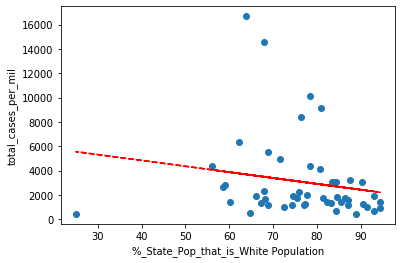

For X = %_State_Pop_that_is_Black Population and Y = total_cases_per_mil : 
Slope is 78.664
Intercept is 2247.347
r-squared is 0.049
r-value is 0.222


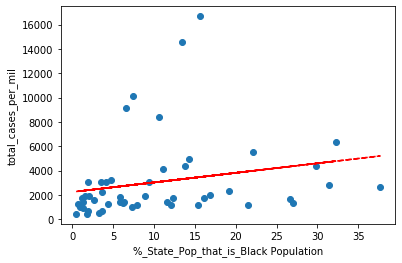

For X = %_State_Pop_that_is_Native Population and Y = total_cases_per_mil : 
Slope is -264.630
Intercept is 3511.133
r-squared is 0.052
r-value is 0.227


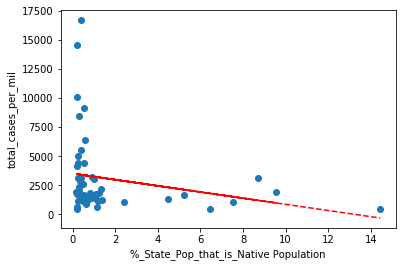

For X = %_State_Pop_that_is_Asian Population and Y = total_cases_per_mil : 
Slope is 62.639
Intercept is 2815.442
r-squared is 0.011
r-value is 0.103


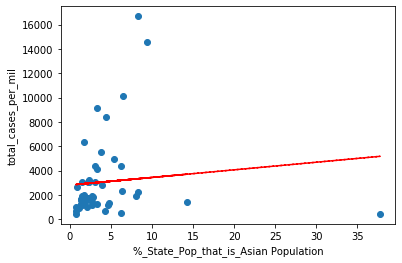

For X = %_State_Pop_that_is_Islander Population and Y = total_cases_per_mil : 
Slope is -350.634
Intercept is 3197.750
r-squared is 0.022
r-value is 0.148


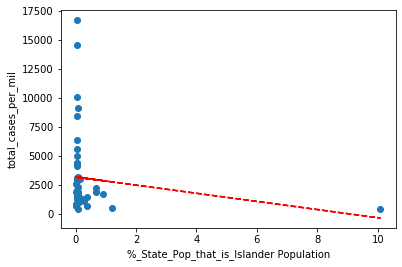

In [25]:
#Regression analysis for % of state pop by ethnicity v total cases per million
ethnic_percent_list= ["%_State_Pop_that_is_White Population", 
"%_State_Pop_that_is_Black Population", 
"%_State_Pop_that_is_Native Population", 
"%_State_Pop_that_is_Asian Population",
"%_State_Pop_that_is_Islander Population"]

for n in ethnic_percent_list:
    reg_output(n,'total_cases_per_mil')

After single regression analyses of each ethnicity revealed r squared values on the order of -2 and a slope of 0, it was concluded that there may be no linear relationship between ethnicity and novel coronavirus. However, a deeper analysis of the parameters shows that the lack of variation in ethnicity proportions may account for the lack of correlation. More specifically, the dominance of the white population within the US at 16-19% throughout all states does not allow for a comparison. Perhaps performing this test on the county level where there exists true variation in ethnicity percentages will allow for a true analysis. 


In [26]:
#multiple linear regression % of state pop by ethnicity vs total cases per million
multi_ethnic= LinearRegression().fit(base_set[["%_State_Pop_that_is_White Population", 
                "%_State_Pop_that_is_Black Population", "%_State_Pop_that_is_Native Population",
                "%_State_Pop_that_is_Asian Population", "%_State_Pop_that_is_Islander Population"]] ,
                                     base_set["total_cases_per_mil"])
white_slope = multi_ethnic.coef_[0]
black_slope=  multi_ethnic.coef_[1]
native_slope= multi_ethnic.coef_[2]
asian_slope= multi_ethnic.coef_[3]
island_slope= multi_ethnic.coef_[4]
multi_intercept = multi_ethnic.intercept_
multi_rsq = multi_ethnic.score(base_set[["%_State_Pop_that_is_White Population", 
                "%_State_Pop_that_is_Black Population", "%_State_Pop_that_is_Native Population",
                "%_State_Pop_that_is_Asian Population", "%_State_Pop_that_is_Islander Population"]] ,
                                     base_set["total_cases_per_mil"])
mat=0 
print("In multi-linear regression against total cases per million")
print('')
for x in ethnic_percent_list:
    print("Slope of " +str(x) + ": " +  str(multi_ethnic.coef_[mat]))
    mat+=1
print("Intercept is {intercept:.3f}".format(intercept = multi_intercept))
print('r-squared is {rsq:.3f}'.format(rsq = multi_rsq))

In multi-linear regression against total cases per million

Slope of %_State_Pop_that_is_White Population: 68.81835605309374
Slope of %_State_Pop_that_is_Black Population: 108.48305070182323
Slope of %_State_Pop_that_is_Native Population: 3.120224413930062
Slope of %_State_Pop_that_is_Asian Population: 791.8856704311244
Slope of %_State_Pop_that_is_Islander Population: -2600.011641697488
Intercept is -5772.776
r-squared is 0.316


The multiple linear regression analysis shown below validates this claim regarding the lack of variability. For instance, the -2600.17 slope for Islander population compared to the slope of 108.4 for Black Population shows that the correlations and their slopes are limited in COVID predictions by the lack of variety in ethnicity distributions across the US. 

### Age (Percent of population aged 65 or over)

COVID-19 has been popularly dubbed an "old-person's diesease', with the elderly being considered the main group of people who are vulnerable to the virus. Thus, it would be rewarding to examine whether or not there is a positive linear relationship between age and the percentage of cases resulting in death.

A csv table was imported from the non-profit Kaiser Family Foundation website that describes the percentage of each state population that is of the age 65 or above.

For X = %_of_population_65+ and Y = %_of_cases_resulting_in_death : 
Slope is 13.656
Intercept is 1.901
r-squared is 0.022
r-value is 0.149


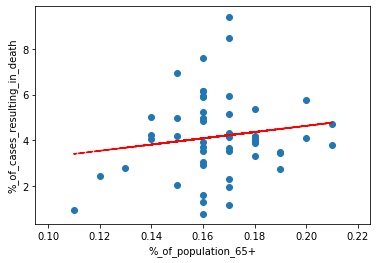

For X = %_of_population_65+ and Y = total_cases_per_mil : 
Slope is -12847.715
Intercept is 5205.142
r-squared is 0.006
r-value is 0.076


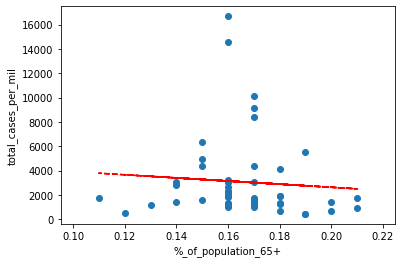

In [27]:
reg_output('%_of_population_65+','%_of_cases_resulting_in_death')
reg_output('%_of_population_65+','total_cases_per_mil')


Regression analysis using percentage of population over the age of 65 to predict percentage of cases resulting in death reveals a positive slope of 13.656 and an R-squared value of 0.022, suggesting a mildly positive relationship between the two, supporting the notion that older people may be more likely to die from COVID-19. That being said, when the same X is used to predict total cases per million, the slope becomes a negative -12847.715 and the R-squared becomes 0.006; from this, we can claim that although states with more elderly people may have a higher death rate, they also have less cases per million members of the population; this may be because a higher proportion of older people in the state may lead more people to undertake stricter social distancing and similar protective measures. Given the low R-Squared indicates minimal correlation, it was determined that a rank correlation model would not be applicable for the data.

## Environmental: Population Density & Temperature

### Population Density

Given the highly contagious nature of COVID-19 and the fact that the government has been calling for social distancing orders, one can infer that the spread of the virus is exacerbated by proximity of people to one another. Given the population density is a proxy for this closeness, it would be revealing to run a regression analysis using the variable to predict total cases per million members of the population. 

A table that included the square mileage of each state from https://state.1keydata.com/, a state information website was converted into a csv using Microsoft Excel and imported to be used in population density calculations. The website did not specify who funded or profited from its creation

For X = Population Density and Y = total_cases_per_mil : 
Slope is 9.907
Intercept is 1097.066
r-squared is 0.599
r-value is 0.774


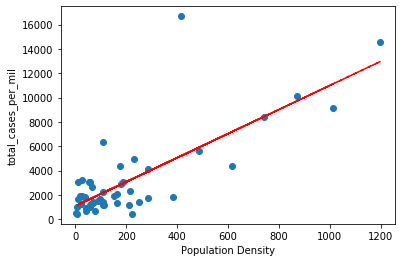

In [28]:
#Population Density vs Total Cases per Million
reg_output('Population Density', 'total_cases_per_mil')

The model returns a slope of 9.907 and a high R-Squared of 0.599, indicating a strong linear relationship between the two variables. This intuitively makes sense given that the closer people are to one another, the more easily the virus can spread amongst the populace.

For X = Population Density and Y = total_deaths_per_mil : 
Slope is 0.628
Intercept is 31.236
r-squared is 0.462
r-value is 0.680


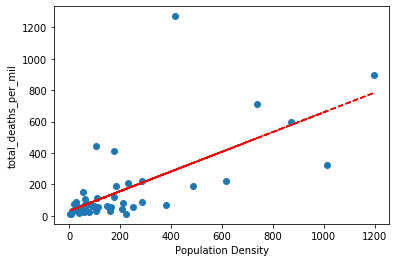

In [29]:
#Population Density vs Total Deaths per Million
reg_output('Population Density', 'total_deaths_per_mil')

Considering the positive relationship between population density and total cases per million, one may raise the question of whether or not population density could positively predict deaths per million. Regression analysis reveals a slope of 0.628 and an R-Squared of 0.462. Although this R-Squared Value is relatively strong, density is clearly a weaker predictor for total deaths per million; this may raise the question of whether population density is directly influencing death rates, or if the relationship just exists because deaths are correlated with cases. 

For X = Population Density and Y = %_of_cases_resulting_in_death : 
Slope is 0.003
Intercept is 3.641
r-squared is 0.141
r-value is 0.376


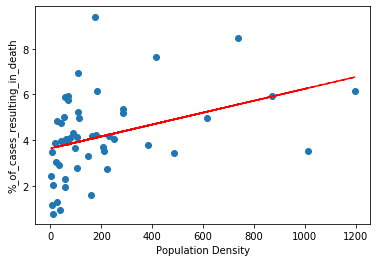

In [30]:
#Population Density vs Percentage of Cases Resulting in Death
reg_output('Population Density', '%_of_cases_resulting_in_death')

A regression analysis using population density to predict the percentage of cases resulting in death produces a slope of 0.003 and an R-Squared of 0.141, indicating a weak correlation between the two variables. This suggests that although population density may be a strong indicator of cases per million, and thus deaths per million, it does not actually bear as strong of an influence on the severity of the virus once someone is affected. The influence it does have may be attributed to the fact that given density increases spread of cases, heightened cases may stretch supplies and personnel thin, leading to an increase in the percentage of cases resulting in death.

In [31]:
#Rank Corrlations

#For Total Cases per Mil
print("Percent Permutated Slopes above actual slope of total_cases_per_mil: " + 
      str(perc_perm_above('Population Density', 'total_cases_per_mil')))
print("")

#For Total Deaths per Mil
print("Percent Permutated Slopes above total_deaths_per_mil: " + 
      str(perc_perm_above('Population Density', 'total_deaths_per_mil')))
print("")

#For Percentage of Cases resulting in death
print(rank_corr('Population Density','%_of_cases_resulting_in_death'))
print("")

Percent Permutated Slopes above actual slope of total_cases_per_mil: 0.0

Percent Permutated Slopes above total_deaths_per_mil: 0.0

Correlation: 0.3761
Correlation of ranks: 0.4857
None



Testing the validity of the high r-squared value between Population Density and Total Cases per Million necessitated a permutation test. Both population density against total cases per million and against total deaths per million showed that 0% of the permuted slopes were larger than the original. This suggests that the relationship between population density and spread of infection is not due to random error. 

The low r-squared value warranted the use of a rank correlation to test whether there is any relationship between a change in population density to a change in percentage of cases resulting in death. The rank correlation was 0.49, higher than the linear correlation of 0.38. This suggests that while the relationship between these two factors may not be linear, analyzing population density can help predict areas within the US with higher death rates as a result of COVID-19.

### Average Temperature (ºF )

The notion that COVID-19 will fade away with summer’s warmer temperatures as does flu season has grown popular as many await the return of normal life, thus it would be rewarding to explore whether an increase in temperature can be expected to produce a decrease in the spread of infections.

A csv was imported from worldpopulationreview.com containing information for the average temperature by state in Fahrenheit for 2019; this was the most recent data found for the measure.

For X = Average Temperature and Y = total_cases_per_mil : 
Slope is -4.668
Intercept is 3315.526
r-squared is 0.000
r-value is 0.013


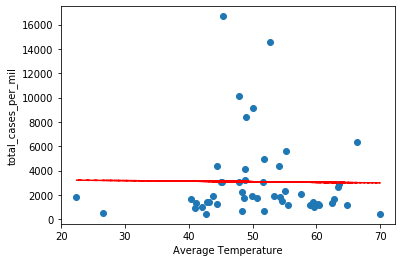

In [32]:
reg_output('Average Temperature', 'total_cases_per_mil')

A regression analysis that uses average temperature to predict total cases per million people produces an R-Squared value of roughly 0 and a  slope of -4.668. Although the negative slope does imply that an increase in temperature would reduce total cases per million, the low R-Squared suggests that there is such a weak linear relationship between the two that practically, people should not expect to see such a decrease in spread over summer. Furthermore, these low r-squared values regarding temperature’s relation to COVID-19 may dispute the conjecture surrounding the statement that people in areas of higher temperature will be less at risk of contracting the virus. However, these tests should be performed on a global scale where temperature varies significantly to completely disprove this hypothesis. 
Given the low R-Squared indicates minimal correlation, it was determined that a rank correlation model would not be applicable for the data.

## Infrastructure: Hospitals and Staffed Beds

The number of hospitals and staffed beds were considered in this analysis in order to analyze the effectiveness of the healthcare infrastructure in combating this new unpredictable disease. 

A csv table that describes the total number of Hospitals and Staffed Beds per state was obtained from the American Hospital Directory website

For X = Number of Hospitals and Y = %_of_cases_resulting_in_death : 
Slope is 0.005
Intercept is 3.799
r-squared is 0.037
r-value is 0.192


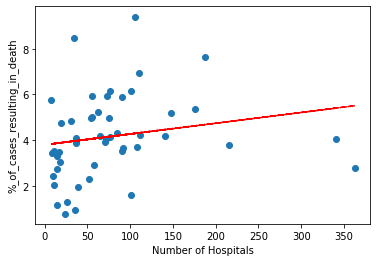

For X = Number of Hospitals and Y = Staffed Beds : 
Slope is 207.420
Intercept is -1271.047
r-squared is 0.917
r-value is 0.957


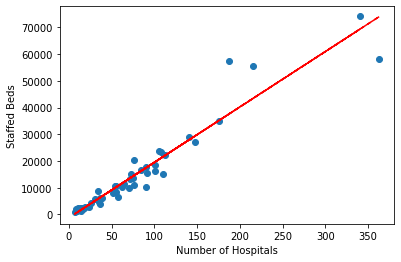

For X = Number of Hospitals and Y = Total Population : 
Slope is 93118.935
Intercept is -725787.375
r-squared is 0.917
r-value is 0.957


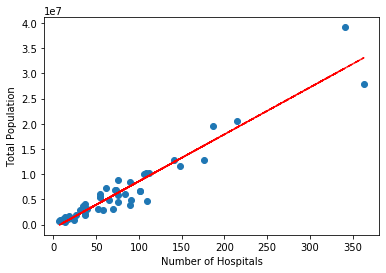

For X = Number of Hospitals and Y = recovered_cases : 
Slope is 46.968
Intercept is 48.074
r-squared is 0.182
r-value is 0.427


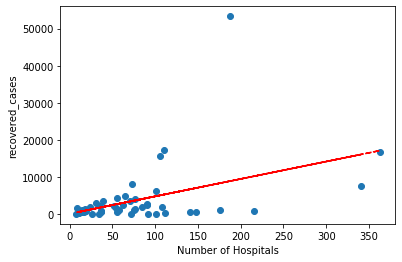

In [33]:
reg_output('Number of Hospitals', '%_of_cases_resulting_in_death')
reg_output('Number of Hospitals', 'Staffed Beds')
reg_output('Number of Hospitals', 'Total Population')
reg_output('Number of Hospitals', "recovered_cases")

An analysis of the linear regression between the number of hospitals and the percent of cases resulting in death shows an interesting scatter plot with an r-squared value of 0.037. The apparent curve of a negative parabolic function can be explained by the fact that the pandemic erupted across the US. Because the number of hospitals is highly correlated to total population (R-squared=0.917), the large initial increase of % cases resulting in death with additional hospitals is caused by this embedded correlation between the quantity of hospitals and highly populated areas that are more susceptible to infection. Thus, counterintuitively as the number of hospitals increases to a certain point, the percent of cases resulting in deaths increases because there are more potential patients present in areas with more hospitals. We suspected that this pattern will exist to a certain point. At a critical point of quantity of hospitals (~200), there is a sufficient number of resources to effectively “flatten the curve” of patients. Because the number of staffed beds is expectedly highly correlated with the number of hospitals(R-squared=0.917), beyond a critical point of resources, there is a sufficient medical resources to effectively decrease the percent of cases that result in death. Interestingly, this theory is challenged by the low r-squared of between hospitals and recovery rate(R-squared=0.182), suggesting that this still ambiguous disease will not simply show a higher rate of recovery with more infrastructure.


In [34]:

#1

print(rank_corr('Number of Hospitals','%_of_cases_resulting_in_death'))
print("")

#2) testing the apparrent relationship between hositals and staffed beds shows a strong correlation not a result of 
#chance confirmed by permutation test

print("Percent Permutated Slopes above actual slope of Staffed Beds: " + 
      str(perc_perm_above('Number of Hospitals','Staffed Beds')))
print("")

#3) Number of hospitals compared to total pop to make sense of interesting %cases resulting in death result 
print("Percent Permutated Slopes above actual slope of Total Population: " + 
      str(perc_perm_above('Number of Hospitals','Total Population')))
print("")
#4) do more hospitals correlate with better recovery
print("Percent Permutated Slopes above actual slope of recovered_cases: " + 
      str(perc_perm_above('Number of Hospitals','recovered_cases')))

Correlation: 0.1924
Correlation of ranks: 0.4098
None

Percent Permutated Slopes above actual slope of Staffed Beds: 0.0

Percent Permutated Slopes above actual slope of Total Population: 0.0

Percent Permutated Slopes above actual slope of recovered_cases: 2.5


The low r-squared between number of hospitals and the percent of cases resulting in death showed a much higher rank correlation of 0.41 compared to linear correlation of 0.19, suggesting that our hypothesis regarding the confounding population factors associated with a high number of hospitals may be causing this strong ranking relationship. Furthermore, our assumptions regarding the relationship between hospitals and staffed beds as well as between hospitals and total population are confirmed by a permutation test showing that 0% of permuted slopes are above that of the original. Lastly, the unexpected low r-squared value between hospitals and recovery rate showed a rank correlation similar to its linear correlation, suggesting that there is more to be explored regarding this relationship between recovery and medical infrastructure.

## Health: Smoking Rate and Deaths from Lower Respiratory Diesease

### Smoking Rate

Based upon the fact that smoking is considered to damage respiratory health, and COVID-19 is a respiratory condition, one can infer that there would be a correlation between the two variables. 

A csv was imported from worldpopulationreview.com describing smoking rate by state.

For X = smoking_rate and Y = %_of_cases_resulting_in_death : 
Slope is -0.007
Intercept is 4.277
r-squared is 0.000
r-value is 0.013


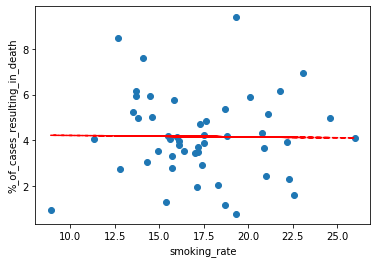

For X = smoking_rate and Y = total_cases_per_mil : 
Slope is -268.472
Intercept is 7730.185
r-squared is 0.077
r-value is 0.278


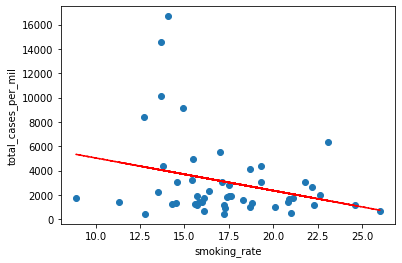

In [35]:
reg_output('smoking_rate','%_of_cases_resulting_in_death')
reg_output('smoking_rate','total_cases_per_mil')

A regression analysis using smoking rate to predict the percentage of cases resulting in death reveals a r-squared value of 0, and a slope of -0.007, implying the absence of a linear relationship. When smoking rate was used to predict total cases per million the r-squared was 0.077 and the slope was  -268.472, again indicating a weak, negative linear relationship. The combination of the low r-squared with the unexpectedly negative slope could suggest that within the United States, smoking is not individually a strong predictor of either the spread or fatality of COVID-19, but may be correlated with another factor that is negatively associated with the total cases per million metric. Given the low R-Squared indicates minimal correlation, it was determined that a rank correlation model would not be applicable for the data.

### Deaths from Lower Respiratory Diesease (per 100,000)

COVID-19 has been reported to severely affect the lower respiratory tract, thus one may infer that the typical rate of deaths from lower respiratory disease could act as a predictor of the spread and fatality of the illness in question; this line of thought argues that historic vulnerability to lower respiratory disease could be an indicator of future vulnerability to COVID-19. 

A csv was imported from the CDC website to obtain data recorded for deaths from chronic lower respiratory disease per 100,000 members of the state population.

For X = lr_deaths_per_100k and Y = total_cases_per_mil : 
Slope is 0.085
Intercept is 2807.846
r-squared is 0.006
r-value is 0.075


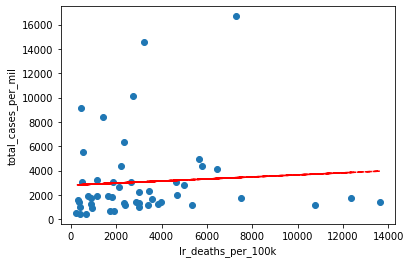

For X = lr_deaths_per_100k and Y = %_of_cases_resulting_in_death : 
Slope is 0.000
Intercept is 3.715
r-squared is 0.053
r-value is 0.230


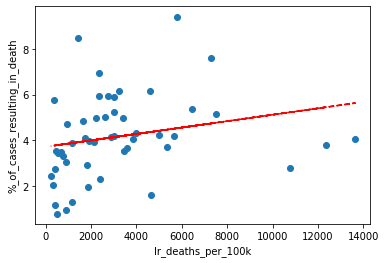

In [36]:
reg_output('lr_deaths_per_100k','total_cases_per_mil')
reg_output('lr_deaths_per_100k','%_of_cases_resulting_in_death')

A regression analysis using deaths from lower respiratory disease per 100,000 people based on 2018 metrics to predict total cases per million produces a minimal r-squared value of 0.006 and a slope of 0.085, implying that a weak positive relationship does exist between the two. A similar regression analysis using the same x to predict the percentage of cases resulting in death produces a slope of 0.000 and an r-squared of 0.053, suggesting that although there may be a weak positive association between the two variables, the slope is so low that we would not expect the relationship to be easily discernible. From these results, we can claim that coronavirus does appear to be distinct from historical respiratory illnesses given the lack of a strong association between the entities.


In [37]:
print('For Deaths from Lower Respiratory Diesease per 100,000 people vs Total Cases per Million : ')
print(rank_corr('lr_deaths_per_100k','total_cases_per_mil'))
print("")
print('For Deaths from Lower Respiratory Diesease per 100,000 people vs Percentage of Cases Resulting in Death : ')
print(rank_corr('lr_deaths_per_100k','%_of_cases_resulting_in_death'))

For Deaths from Lower Respiratory Diesease per 100,000 people vs Total Cases per Million : 
Correlation: 0.0751
Correlation of ranks: 0.1926
None

For Deaths from Lower Respiratory Diesease per 100,000 people vs Percentage of Cases Resulting in Death : 
Correlation: 0.2297
Correlation of ranks: 0.4264
None


The low R-squared values that suggested no linear relationship were tested further with a rank correlation. Comparing the rank correlations to their linear counterparts suggests that there may not be a linear relationship between the X variable of deaths from lower respiratory diesease per 100,000 people and both the Y variables total cases per million and the percentage of cases resulting in death. However, considering the impact of COVID-19 on respiratory health, further analysis should be done regarding the relationship between these respiratory vulnerabilities and COVID-19 infections.

## Economic: Per Capita Income

Because many studies have shown that higher economic status correlates with superior physical health, we were curious to discover whether a state with higher average per capita income would be more resilient to novel coronavirus. 

Given recent income per capita was not made available in csv or table format, **web-scraping** was used to obtain data for the measure from bullet points posted to worldpopulationreview.com.

For X = Per Capita Income and Y = total_cases_per_mil : 
Slope is 0.241
Intercept is -9399.780
r-squared is 0.351
r-value is 0.593


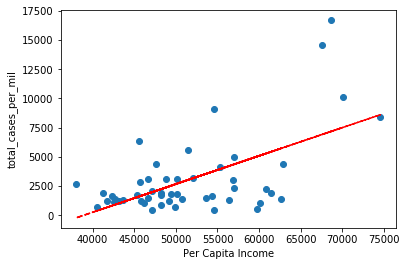

For X = Per Capita Income and Y = total_deaths_per_mil : 
Slope is 0.018
Intercept is -748.627
r-squared is 0.355
r-value is 0.596


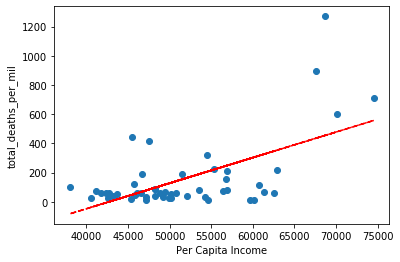

For X = Per Capita Income and Y = active_per_total : 
Slope is 0.001
Intercept is 22.795
r-squared is 0.065
r-value is 0.255


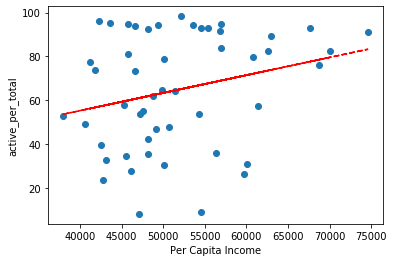

For X = Per Capita Income and Y = recovered_per_total : 
Slope is -0.001
Intercept is 76.359
r-squared is 0.073
r-value is 0.269


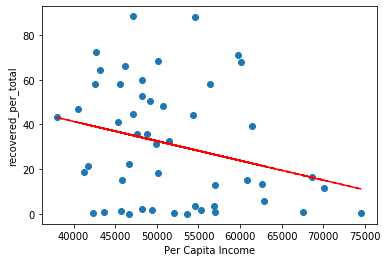

For X = Per Capita Income and Y = total_tests : 
Slope is 8.928
Intercept is -315357.030
r-squared is 0.161
r-value is 0.402


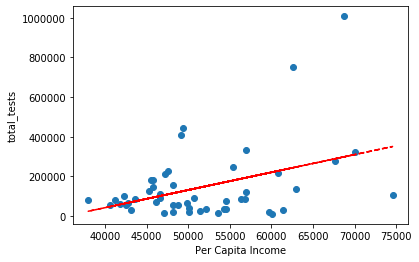

In [38]:
reg_output('Per Capita Income','total_cases_per_mil')
reg_output('Per Capita Income','total_deaths_per_mil')
reg_output('Per Capita Income','active_per_total')
reg_output('Per Capita Income','recovered_per_total')
reg_output('Per Capita Income','total_tests')

Contrary to our predictions, the linear regression between per capita income and total cases per million shows an r-squared value of 0.351 and a slope of 0.241. Additionally, the regression between per capita income and total deaths per million shows a similar r-squared of 0.355 but a smaller slope of 0.018. This unexpected outcome may signify confounding factors that exist within income. For example, states with higher mean income might have larger cities with hotspots for disease spread. In fact, linear regression analysis between the percentage of total cases that are active and income as well as between the percentage of total cases that are recovered and income show r-squared values on the order of -2 and slopes that are approximately 0. This suggests no linear relationship between the median income of a state and its ability to avoid/recover from novel coronavirus. There was however an r-squared of 0.161 between number of tests administered and per capita income. While this can be explained by states with richer citizens having better access to testing, this is likely a result of confounding factors such as the necessity of test distribution based on large dense cities with high rates of infection. 

In [39]:
print("Percent Permutated Slopes above actual slope for total_cases_per_mil : " + 
str(perc_perm_above('Per Capita Income','total_cases_per_mil')))
print("")                  


print("Percent Permutated Slopes above actual slope for total_deaths_per_mil :" +
      str(perc_perm_above('Per Capita Income','total_deaths_per_mil')))
print("")                  


print('For Per Capita Income vs Active per Total Cases : ')
print(rank_corr('Per Capita Income','active_per_total'))
print("")           

print('For Per Capita Income vs Active per Recovered Cases : ')
print(rank_corr('Per Capita Income','recovered_per_total'))
print("")

print("Percent Permutated Slopes above actual slope:" +
      str(perc_perm_above('Per Capita Income','total_tests')))
print("")                  

print("")


Percent Permutated Slopes above actual slope for total_cases_per_mil : 0.0

Percent Permutated Slopes above actual slope for total_deaths_per_mil :0.0

For Per Capita Income vs Active per Total Cases : 
Correlation: 0.2547
Correlation of ranks: 0.2010
None

For Per Capita Income vs Active per Recovered Cases : 
Correlation: -0.2695
Correlation of ranks: -0.2401
None

Percent Permutated Slopes above actual slope:0.4




The very low r-squared values that suggested no linear relationship were also tested further with a rank correlation. Comparing each of the rank correlations of total cases that are active and total cases that are recovered against their linear correlations with income shows little to no change. This suggests that not only are these factors not linearly associated with income, but they may not have any statistically significant correlation with this economic factor. Lastly, only 0.7% of permuted slopes are above the actual slope of 8.98 between tests and per capita income, showing proof for our hypothesis that there exists some relationship between wealth and number of tests administered.

# Conclusion

We should acknowledge that the study may be affected by the confounding factor of days since the first recorded case. At the time of measurement, news outlets report that coastal states like New York and California had supposedly reached the apex of the spread, whereas midwestern states had still been in the escalating stages of transmission. Given that as cases increase, hospital equipment and staff would be expected to be spread more thinly, resulting in more deaths, those states near the peak of their “curve” could have faced a disproportionate spike in spread and fatalities as a result.

In reflection, it would be preferable to analyze data on a more specific scale (e.g. by City or County), given that demographic and geographic factors can vary significantly within individual states. For instance, the average population density estimate for New York will not be consistent throughout the state  given the large differences in density between New York City and the sparsely populated upstate region. Therefore, analysis comparing population data with COVID statistics may reveal false relationships due to the skew of averaging over a variety of values. Although an analysis of the county level is preferred, given the short time span from the start of this pandemic, there is currently not sufficient data collected regarding the factors of interest at this specific level. Therefore, if County of City data for COVID were used, the exploration would require disregarding many variables of interest given that they have not been accurately recorded or available on a level more specific than state. Thus, this investigation will be conducted on a state-to-state basis for breadth and variety of potential input factors moving forwards. Washington D.C. was excluded given its small residential population as well as difficulty in finding COVID and demographic information at this level.

Given that we expect the availability of useful data to increase with time, we would hope to run similar tests considering our variables on a county by county basis when the information eventually becomes readily available.


# Source Code/References

Folder attached includes all source code.

# Acknowledgments

Acknowledgements: Thank you to the following (in no particular order) for all of your help with this project

Stack OverFlow (https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas)
Irena Papst
Greg Yauney
